# SQLBonus_ras

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
from config import p_pass

# A table was created in SQL which combined titles and salaries it is title_sal and the SQL script to create it is Bonus_ras.sql

# This method of connecting to postgres from python was found at pynative.com

In [2]:
connection = psycopg2.connect(user="postgres",
                                  password=p_pass,
                                  host="127.0.0.1",
                                  port="5432",
                                  database="Employees")

# execute a query and fetch it

cursor = connection.cursor()
postgreSQL_select_Query = "SELECT * FROM title_sal"

cursor.execute(postgreSQL_select_Query)

sal_records = cursor.fetchall() 

# Create lists of titles and salaries

titles=[]
salaries=[]
for row in sal_records:
    titles.append(row[0])
    salaries.append(row[2])

# Disconnect and close 

if(connection):
    cursor.close()
    connection.close()

print(f'length of titles :{len(titles)}  and  length of salaries  :{len(salaries)}')

length of titles :443308  and  length of salaries  :443308


In [3]:
# Create a dataframe and pandasize it.
sal_df=pd.DataFrame({"Title":titles,"Salary":salaries})
sal_df.head()


,Title,Salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


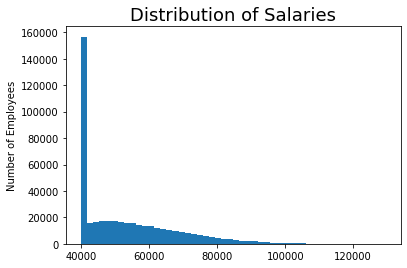

In [4]:
# create a historgram of salaries
x=sal_df.Salary

#plt.xlabel("Annual Salary")
plt.ylabel("Number of Employees")
plt.title("Distribution of Salaries",size=18)
plt.hist(x,bins=50)
plt.show()


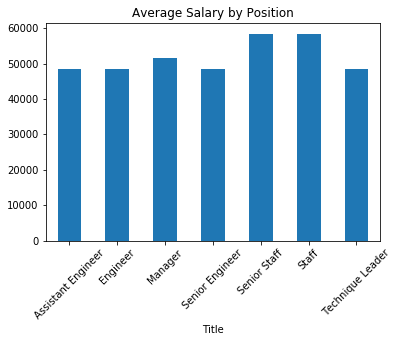

In [5]:
# group data by title and produce a bar chart of the average salary by title
group=sal_df['Salary'].groupby(sal_df['Title'])
group.mean().plot.bar(x='Title',rot=45,title="Average Salary by Position")


In [ ]:
# There were a lot of salaries at $40,000, which was unexpected, especially for the 1980s and 1990s.
# The data indicates staff had a higher average salary than managers or engineers and there was
# no apparent increases in salaries based on experience.